In [ ]:
#1. Drawing Bar Charts (draw bar charts using Pandas and matplotlib.)

#Load Dataset

import pandas as pd
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()

# Convert to DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add target column
df['target'] = iris.target

print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


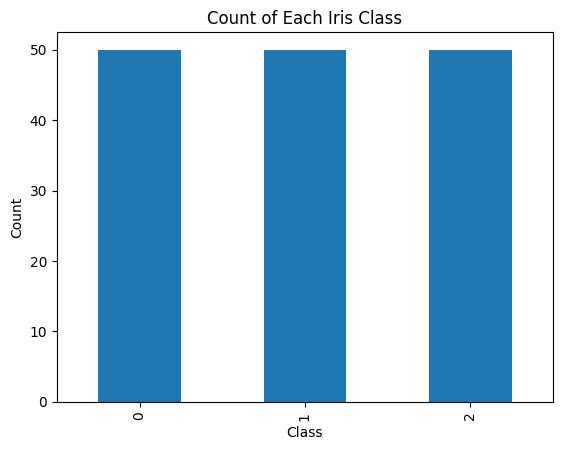

In [ ]:
#2.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()

# Create DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Count target values
class_counts = df['target'].value_counts()

# Plot bar chart
class_counts.plot(kind='bar')

plt.title("Count of Each Iris Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


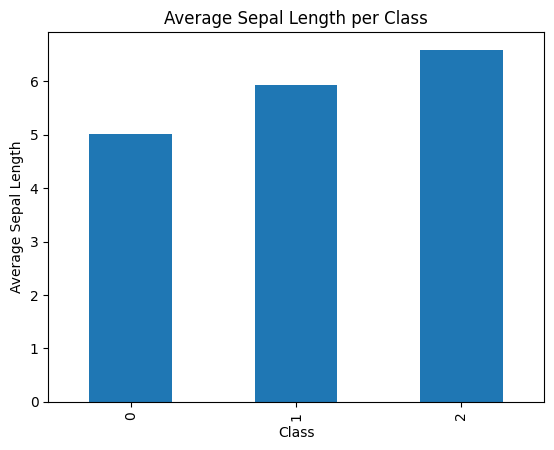

In [ ]:
# Average Sepal Length per Class
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()

# Create DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Your code
avg_values = df.groupby('target')['sepal length (cm)'].mean()

avg_values.plot(kind='bar')

plt.title("Average Sepal Length per Class")
plt.xlabel("Class")
plt.ylabel("Average Sepal Length")
plt.show()

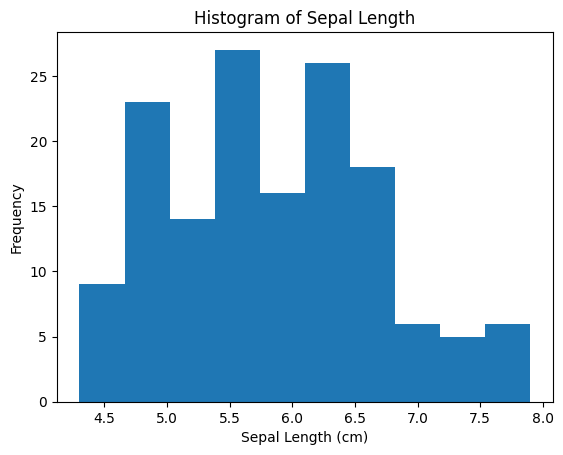

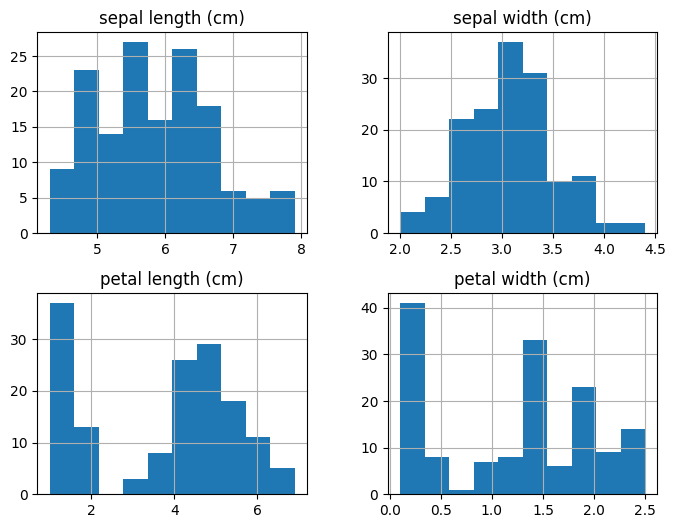

In [ ]:
#Histogram of Sepal Length  and all features
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()

# Create DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Your histogram code
df['sepal length (cm)'].plot(kind='hist', bins=10)

plt.title("Histogram of Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.show()
df.hist(figsize=(8,6))
plt.show()


In [ ]:
# 2. Drawing Some Other Kinds of Plots with Matplotlib
#2.1

import pandas as pd
from sklearn.datasets import load_iris

# ==============================
# Load Dataset
# ==============================
iris = load_iris()

# Convert to DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add target column
df['target'] = iris.target

# Display first 5 rows
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


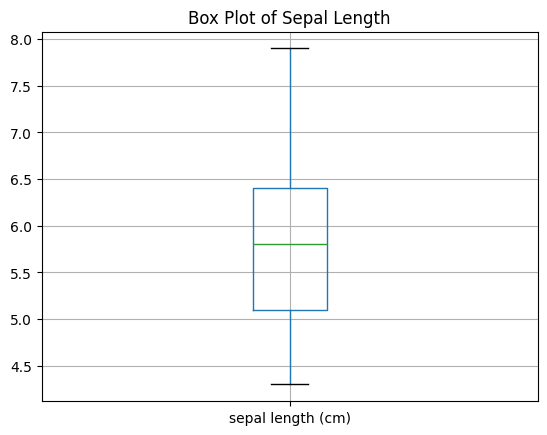

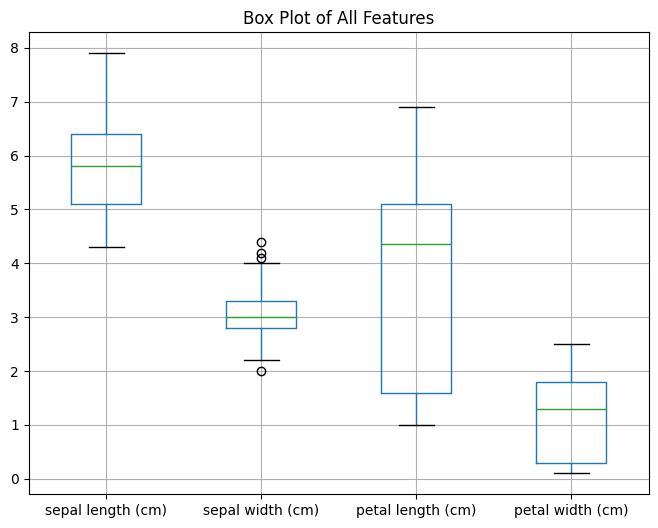

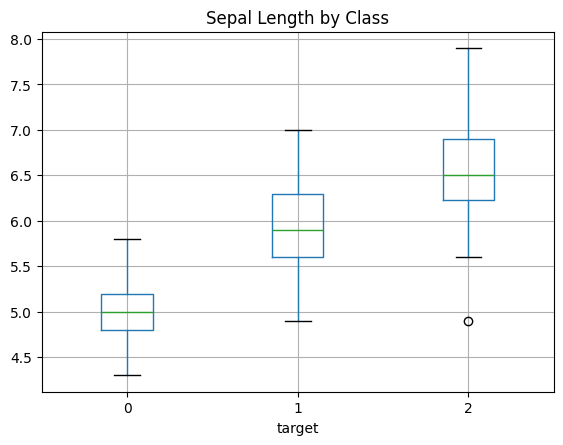

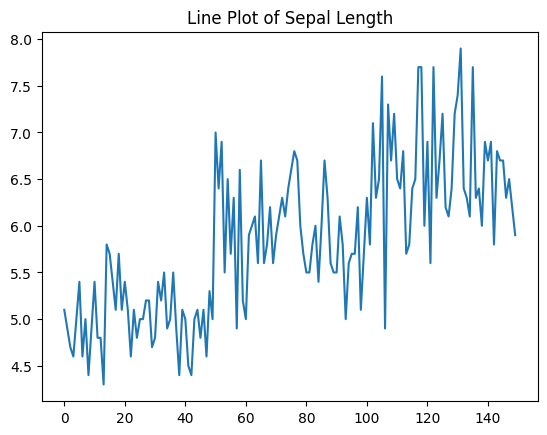

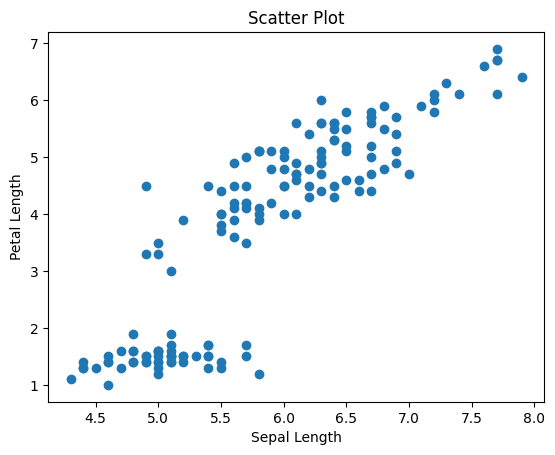

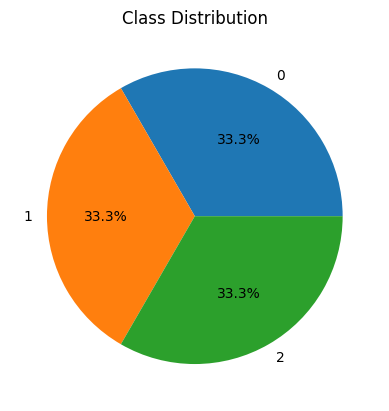

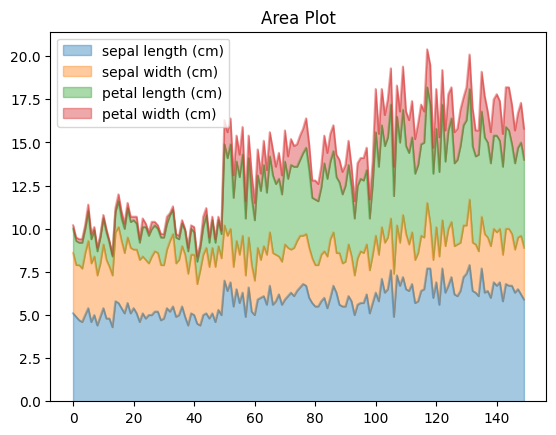

In [ ]:
# Box Plot for One Feature
df.boxplot(column='sepal length (cm)')
plt.title("Box Plot of Sepal Length")
plt.show()


# Box Plot for All Features
df.iloc[:, 0:4].boxplot(figsize=(8,6))
plt.title("Box Plot of All Features")
plt.show()


# Class-wise Box Plot
df.boxplot(column='sepal length (cm)', by='target')
plt.title("Sepal Length by Class")
plt.suptitle("")
plt.show()

#Line Plot
plt.plot(df['sepal length (cm)'])
plt.title("Line Plot of Sepal Length")
plt.show()

# Scatter Plot
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Scatter Plot")
plt.show()


#Pie Chart
df['target'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Class Distribution")
plt.ylabel("")
plt.show()


#Area Plot
df.iloc[:, 0:4].plot.area(alpha=0.4)
plt.title("Area Plot")
plt.show()


In [ ]:
#HANDLING MISSING DATA
# ==============================
# Import Required Libraries
# ==============================
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# ==============================
# 1️⃣ Create Sample Dataset with Missing Values
# ==============================
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, np.nan, 30, 22, np.nan],
    'Salary': [50000, 60000, np.nan, 45000, 52000],
    'Department': ['HR', 'IT', 'IT', np.nan, 'Finance']
}

df = pd.DataFrame(data)
print("Original DataFrame:\n", df)

# ==============================
# 2️⃣ Detect Missing Values
# ==============================
print("\nMissing Values (True = missing):\n", df.isnull())
print("\nMissing Values per Column:\n", df.isnull().sum())

# ==============================
# 3️⃣ Remove Missing Data
# ==============================
# Drop rows with any missing values
df_drop_rows = df.dropna()
print("\nAfter Dropping Rows with Missing Values:\n", df_drop_rows)

# Drop columns with any missing values
df_drop_cols = df.dropna(axis=1)
print("\nAfter Dropping Columns with Missing Values:\n", df_drop_cols)

# ==============================
# 4️⃣ Fill Missing Data (Warning-Free)
# ==============================
# Fill numeric columns
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

# Fill categorical columns
df['Department'] = df['Department'].fillna('Unknown')

print("\nAfter Filling Missing Values:\n", df)

# ==============================
# 5️⃣ Imputation using sklearn
# ==============================
# Re-create some missing values for demonstration
df.loc[1, 'Age'] = np.nan
df.loc[2, 'Salary'] = np.nan
df.loc[3, 'Department'] = np.nan

# Impute numeric columns with mean
num_imputer = SimpleImputer(strategy='mean')
df[['Age', 'Salary']] = num_imputer.fit_transform(df[['Age', 'Salary']])

# Impute categorical columns with most frequent
cat_imputer = SimpleImputer(strategy='most_frequent')
df[['Department']] = cat_imputer.fit_transform(df[['Department']])

print("\nAfter sklearn Imputation:\n", df)

Original DataFrame:
       Name   Age   Salary Department
0    Alice  25.0  50000.0         HR
1      Bob   NaN  60000.0         IT
2  Charlie  30.0      NaN         IT
3    David  22.0  45000.0        NaN
4      Eve   NaN  52000.0    Finance

Missing Values (True = missing):
     Name    Age  Salary  Department
0  False  False   False       False
1  False   True   False       False
2  False  False    True       False
3  False  False   False        True
4  False   True   False       False

Missing Values per Column:
 Name          0
Age           2
Salary        1
Department    1
dtype: int64

After Dropping Rows with Missing Values:
     Name   Age   Salary Department
0  Alice  25.0  50000.0         HR

After Dropping Columns with Missing Values:
       Name
0    Alice
1      Bob
2  Charlie
3    David
4      Eve

After Filling Missing Values:
       Name        Age   Salary Department
0    Alice  25.000000  50000.0         HR
1      Bob  25.666667  60000.0         IT
2  Charlie  30.00

In [ ]:

#1. Using isnull()

#1.1 Example
import pandas as pd
import numpy as np
d = {'First Score': [100, 90, np.nan, 95],
'Second Score': [30, 45, 56, np.nan],
'Third Score': [np.nan, 40, 80, 98]}
df = pd.DataFrame(d)
mv = df.isnull()
print(mv)




   First Score  Second Score  Third Score
0        False         False         True
1        False         False        False
2         True         False        False
3        False          True        False


In [ ]:
#1.2 Example
import pandas as pd
d = pd.read_csv("/content/data1.csv")
bool_series = pd.isnull(d["name"])
missing_gender_data = d[bool_series]
print(missing_gender_data)

Empty DataFrame
Columns: [name, age, city, category, sales, a, b]
Index: []
